In [17]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [18]:
data_folder_name = 'dl-itba-cifar-100-2024-q-1'

def getFileNames(folder_name):
    
    path = os.path.join(os.getcwd(),'..','..',folder_name)
    file_names = os.listdir(path)

    return file_names 

print(getFileNames(data_folder_name))

['coarse_label_names.pck', 'fine_label_names.pck', 'x_test.npy', 'x_train.npy', 'y_train_coarse.npy', 'y_train_fine.npy']


In [19]:
file_names = getFileNames(data_folder_name)

# Lectura de archivos '.npy' 

x_test = np.load('../'+'../'+data_folder_name+'/'+file_names[2])
x_train = np.load('../'+'../'+data_folder_name+'/'+file_names[3])
y_train_coarse = np.load('../'+'../'+data_folder_name+'/'+file_names[4])
y_train_fine = np.load('../'+'../'+data_folder_name+'/'+file_names[5])

# Lectura de archivos '.pck'

with open('../'+'../'+data_folder_name+'/'+file_names[0], "rb") as f:
    coarse_label_names = pickle.load(f)
f.close()

with open('../'+'../'+data_folder_name+'/'+file_names[1], "rb") as f:
    fine_label_names = pickle.load(f)
f.close()

print('Dimensiones de los datos:')
print(x_test.shape)
print(x_train.shape)
print(y_train_coarse.shape)
print(y_train_fine.shape)

print('Cantidad de clases:')
print(np.shape(coarse_label_names))
print(np.shape(fine_label_names))

Dimensiones de los datos:
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(50000,)
(50000,)
Cantidad de clases:
(20,)
(100,)


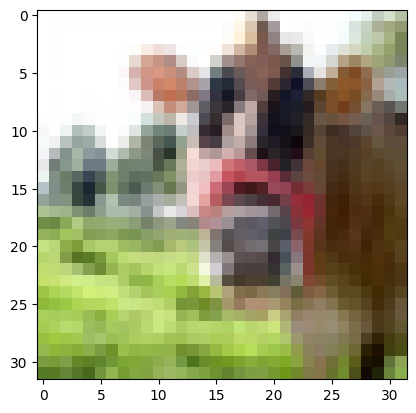

In [28]:
plt.imshow(x_train[0])
plt.show()

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

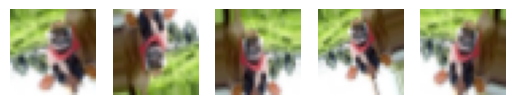

In [34]:
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Load the original image
img = x_train[0]

# Reshape the image to a 4D tensor with shape (1, height, width, channels)
img = img.reshape((1,) + img.shape)

# Generate augmented images
augmented_images = []
for batch in datagen.flow(img, batch_size=1):
    augmented_images.append(batch[0])
    if len(augmented_images) >= 5:
        break  # Stop the loop after generating 5 augmented images

for i, img in enumerate(augmented_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.uint8(img))
    plt.axis('off')
plt.show()